# 머신러닝

## 지도학습

입력과 결과가 있는 경우  
데이터와 해석 모델을 만들고 이를 통해 새로운 데이터 추정  
많은 양질의 데이터 필요  
분류, 회귀 문제에서 사용  
분류 : 양자화 된 정수값을 추정  
회귀 : 실수 값을 추정  

##  비지도 학습

입력은 있느나 결과는 없는 경우  
패턴과 특성, 구졸르 스스로 찾아서 학습  
결과가 지도학습보단 좋지 않음  
군집 문제에서 사용

### 준지도 학습

지도학습 + 비지도 학습

### 강화 학습

동작이 적절한지 피드백을 반영하면서 학습->보상  
보상을 통해 학습 상태를 인식하게 하여 보상이 최대화 되도록 최적화된 행동을 수행하도록 학습


## 적합
과소적합, 과대 적합 둘다 피해야 함.  
bias, variance 둘 다 최소화  

## 레이블과 특성

레이블(label, class) : 종속 변수 => 답을 의미함.
특성(feature) : 독립 변수 => 답을 찾기 위한 변수들, 위험 인자, 설명 변수라고도 함

In [3]:
from sklearn.datasets import load_iris
iris_bunch = load_iris()  #dict 타입
type(iris_bunch), iris_bunch.keys()

(sklearn.utils.Bunch,
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']))

In [13]:
import seaborn as sns
iris2 = sns.load_dataset('iris')
iris2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
print(iris_bunch.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
type(iris_bunch.data), iris_bunch.data[:5], iris_bunch.data.shape

(numpy.ndarray,
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 (150, 4))

In [6]:
iris_bunch.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
type(iris_bunch.target), iris_bunch.target, iris_bunch.target.shape

(numpy.ndarray,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 (150,))

In [8]:
iris_bunch.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
print([iris_bunch.target_names[target] for target in iris_bunch.target])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

##  데이터 분할

학습용 : 평가용 => 7:3 정도(기본 75:25)  
학습용 : 검증용 : 평가용 => 5:3:2  
train_test_split => sklearn.model_selection, 데이터 분할에 사용

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

x = np.arange(10)

x_train, x_test = train_test_split(x)
print(x_train)
print(x_test)

[0 3 1 4 2 7 9]
[6 8 5]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(iris_bunch.data,iris_bunch.target, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [19]:
from sklearn.model_selection import train_test_split

x_tra, x_te, y_tra, y_te = train_test_split(
    iris_bunch['data'],
    iris_bunch['target'], 
    test_size=0.3
)
x_tra.shape, x_te.shape, y_tra.shape, y_te.shape

((105, 4), (45, 4), (105,), (45,))

In [22]:
x_tra, x_train    # 랜덤이라 시행마다 다름 => 결과값이 다름. => 검증 불가능

(array([[4.8, 3.4, 1.9, 0.2],
        [6.7, 3.1, 4.7, 1.5],
        [5.9, 3.2, 4.8, 1.8],
        [7.6, 3. , 6.6, 2.1],
        [5.9, 3. , 5.1, 1.8],
        [4.6, 3.1, 1.5, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [6.8, 3. , 5.5, 2.1],
        [5.1, 3.3, 1.7, 0.5],
        [5.6, 3. , 4.5, 1.5],
        [5.1, 3.8, 1.6, 0.2],
        [6.4, 3.2, 4.5, 1.5],
        [5.4, 3.4, 1.5, 0.4],
        [6.1, 3. , 4.6, 1.4],
        [5.5, 3.5, 1.3, 0.2],
        [6.6, 3. , 4.4, 1.4],
        [6.3, 2.8, 5.1, 1.5],
        [6.5, 3. , 5.8, 2.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.4, 2.8, 6.1, 1.9],
        [7.7, 2.8, 6.7, 2. ],
        [6.1, 2.8, 4.7, 1.2],
        [4.8, 3. , 1.4, 0.1],
        [5.4, 3.9, 1.3, 0.4],
        [5.4, 3. , 4.5, 1.5],
        [5.8, 2.8, 5.1, 2.4],
        [6. , 2.2, 4. , 1. ],
        [5.1, 3.4, 1.5, 0.2],
        [4.9, 3.1, 1.5, 0.2],
        [7.2, 3.6, 6.1, 2.5],
        [4.6, 3.2, 1.4, 0.2],
        [6.4, 2.8, 5.6, 2.1],
        [6. , 3. , 4.8, 1.8],
        [5

In [24]:
from sklearn.model_selection import train_test_split

x_tra, x_te, y_tra, y_te = train_test_split(
    iris_bunch['data'],
    iris_bunch['target'], 
    test_size=0.3,
    random_state= 100   # 난수생성 기준숫자
)
x_tra

array([[4.6, 3.4, 1.4, 0.3],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 3.2, 1.2, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [6.1, 3. , 4.9, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 2.9, 4.2, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.7, 3.9, 1.2],
       [4.6, 3.6, 1. , 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2.8, 5.1, 1.5],
       [5.5, 4.2, 1.4, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3.9, 1.7, 0.4],
       [5.5, 3.5, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [6.7, 3.3, 5.7, 2.5],
       [6.1, 2.6, 5.6, 1.4],
       [5.4, 3.7, 1.5, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [5.9, 3.2, 4.8, 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [6.8, 2

In [25]:
x_tra[:5]

array([[4.6, 3.4, 1.4, 0.3],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [4.9, 3.1, 1.5, 0.1]])

In [26]:
y_tra[:5]

array([0, 0, 0, 1, 0])

In [27]:
x_te[0:2], y_te[0:2]

(array([[6.4, 2.8, 5.6, 2.1],
        [4.8, 3.4, 1.6, 0.2]]),
 array([2, 0]))

In [63]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_tra, y_tra)   # 훈련 데이터로 훈련

# 값 예측 출력

# 입력 값에 대한 예측값 출력 - 오류
# 오류 발생 : model.predict([6.4, 2.8, 5.6, 2.1]) 
# ==> ValueError: Expected 2D array, got 1D array instead: 입력 값 1차원, 입력값은 반드시 2차원

# 입력 값에 대한 예측값 출력
model.predict([[6.4, 2.8, 5.6, 2.1]])  # 예측 : 2, 실제 2
model.predict([[4.8, 3.4, 1.6, 0.2]])  # 예측 : 0, 실제 0
# 비효율 => 변수로
model.predict([x_te[0]])  # 인덱싱
model.predict(x_te[0:50]) # 슬라이싱

# 예측값과 실제 값과의 비교
print('예측값 : ', model.predict(x_te))
print('실제값 : ', y_te)

# 정확도 계산 (모델 평가)
print(round(model.score(x_te,y_te),2))

# 학습 데이터/ 평가데이터 평가
print('학습 데이터 성능 : ', round(model.score(x_tra,y_tra),2))
print('평가 데이터 성능 : ', round(model.score(x_te,y_te),2))

예측값 :  [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]
실제값 :  [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2 1 1 2 0 0 1 0
 1 2 2 0 1 2 2 0]
0.98
학습 데이터 성능 :  1.0
평가 데이터 성능 :  0.98


In [67]:
# DF로 모델 평가하기

import seaborn as sns

iris2 = sns.load_dataset('iris')
iris2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [72]:
x = iris2.drop(columns=['species'])
y = iris2['species']

In [73]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(
    x,
    y,
    test_size= 0.3,
    random_state= 100
)
x_tr.shape, x_te.shape, y_tr.shape, y_te.shape

((105, 4), (45, 4), (105,), (45,))

In [74]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_tr, y_tr)   # 훈련 데이터로 훈련


# 학습 데이터/ 평가데이터 평가
print('학습 데이터 성능 : ', round(model.score(x_tra,y_tra),2))
print('평가 데이터 성능 : ', round(model.score(x_te,y_te),2))

학습 데이터 성능 :  0.0
평가 데이터 성능 :  0.98


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## fish.csv를 읽어 KNN으로 훈련, 성능평가 점수 출력.

In [111]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# csv 파일 읽기
data = pd.read_csv('fish.csv')

# label과 feature 구분
x = data.drop(columns=['Species'])
y = data['Species']

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(
    x,
    y,
    test_size= 0.3,
    random_state= 4,
    stratify = y # y 기준 동일 비율로 분할
)

# 모델 객체 생성
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_tr, y_tr)   # 훈련 데이터로 훈련


# 학습 데이터/ 평가데이터 평가
print('학습 데이터 성능 : ', round(model.score(x_tr,y_tr),2))
print('평가 데이터 성능 : ', round(model.score(x_te,y_te),2))

학습 데이터 성능 :  1.0
평가 데이터 성능 :  0.62


In [106]:
# 어종 갯수
y.unique(), len(y.unique()), y.nunique()

(array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
       dtype=object),
 7,
 7)

In [114]:
pd.DataFrame(model.predict_proba(x_test), columns = ['0일 확률', '1일 확률']).head()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but KNeighborsClassifier is expecting 5 features as input.

In [123]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# csv 파일 읽기
data = pd.read_csv('fish.csv')

# label과 feature 구분
x = data.drop(columns=['Species'])
y = data['Species']

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(
    x,
    y,
    test_size= 0.3,
    random_state= 4,
    stratify = y # y 기준 동일 비율로 분할
)

# 최적 결과 산출 준비
k_range = range(1,101)
train_score = []
test_score = []

# 모델 객체 생성 for 문 추가
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_tr, y_tr)   # 훈련 데이터로 훈련
    train_score.append(round(model.score(x_tr,y_tr),2))
    test_score.append(round(model.score(x_te,y_te),2))

# 학습 데이터/ 평가데이터 평가
print(train_score)
print(test_score)

[1.0, 0.74, 0.72, 0.68, 0.67, 0.59, 0.6, 0.55, 0.52, 0.5, 0.5, 0.52, 0.5, 0.49, 0.48, 0.51, 0.5, 0.52, 0.52, 0.51, 0.5, 0.5, 0.5, 0.51, 0.48, 0.5, 0.42, 0.43, 0.42, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.4, 0.4, 0.39, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.41, 0.43, 0.4, 0.42, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
[0.62, 0.65, 0.54, 0.62, 0.54, 0.54, 0.56, 0.48, 0.54, 0.58, 0.56, 0.58, 0.58, 0.58, 0.54, 0.6, 0.56, 0.58, 0.54, 0.56, 0.5, 0.5, 0.52, 0.56, 0.5, 0.56, 0.46, 0.46, 0.44, 0.44, 0.44, 0.44, 0.44, 0.42, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.42, 0.42, 0.42, 0.42, 0.44, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.4, 0.4, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3

[1.0, 0.99, 0.97, 0.98, 0.98, 0.97, 0.98, 0.96, 0.96, 0.96, 0.97, 0.97, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.96, 0.95, 0.96, 0.95, 0.95, 0.96, 0.95, 0.95, 0.96, 0.96, 0.97, 0.96, 0.96, 0.96, 0.96, 0.95, 0.93, 0.93, 0.93, 0.94, 0.91, 0.94, 0.93, 0.94, 0.92, 0.93, 0.91, 0.93, 0.93]
[0.96, 0.91, 0.96, 0.96, 1.0, 0.93, 0.98, 0.93, 0.98, 0.93, 0.96, 0.93, 0.98, 0.93, 0.96, 0.93, 0.93, 0.89, 0.91, 0.91, 0.91, 0.89, 0.89, 0.89, 0.91, 0.89, 0.93, 0.91, 0.93, 0.91, 0.91, 0.91, 0.93, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.89, 0.89, 0.87, 0.87, 0.89, 0.89, 0.89, 0.84, 0.82, 0.84, 0.82]


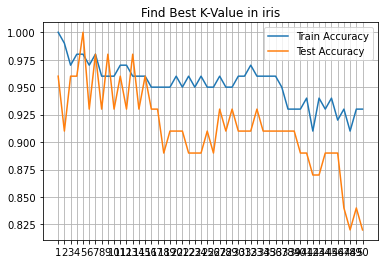

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


iris = sns.load_dataset('iris')

x = iris.drop(columns=['species'])
y = iris['species']


x_tr, x_te, y_tr, y_te = train_test_split(
    x,
    y,
    test_size= 0.3,
    random_state= 100,
    stratify = y # y 기준 동일 비율로 분할
)

# k 값 선택
k_range = range(1,51)
train_score = []
test_score = []

# 모델 객체 생성 for 문 추가
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_tr, y_tr)   # 훈련 데이터로 훈련
    train_score.append(round(model.score(x_tr,y_tr),2))
    test_score.append(round(model.score(x_te,y_te),2))

# 학습 데이터/ 평가데이터 평가
print(train_score)
print(test_score)

# 평가 결과 시각화
plt.plot(k_range, train_score, label = 'Train Accuracy')
plt.plot(k_range, test_score, label = 'Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-Value in iris')
plt.legend()
plt.grid()
plt.show()

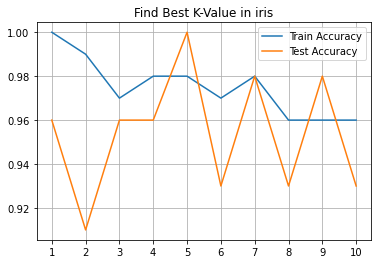

In [137]:
# 평가 결과 시각화
plt.plot(k_range, train_score, label = 'Train Accuracy')
plt.plot(k_range, test_score, label = 'Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-Value in iris')
plt.legend()
plt.grid()
plt.show()

[1.0, 0.97, 0.95, 0.95, 0.94, 0.94, 0.93, 0.94, 0.93, 0.93, 0.93, 0.94, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.92, 0.93, 0.92, 0.92]
[0.91, 0.92, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.94, 0.94, 0.95, 0.95, 0.95, 0.95, 0.94, 0.95]


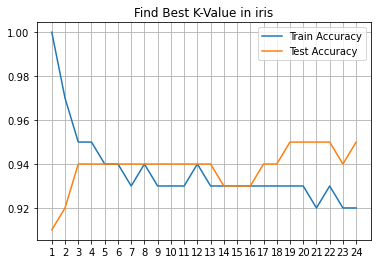

In [171]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = load_breast_cancer()

x = data['data']
y = data['target']

x_tr, x_te, y_tr, y_te = train_test_split(
    x,
    y,
    test_size= 0.3,
    random_state= 100,
    stratify = y # y 기준 동일 비율로 분할
)

# k 값 선택
k_range = range(1,25)
train_score = []
test_score = []

# 모델 객체 생성 for 문 추가
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_tr, y_tr)   # 훈련 데이터로 훈련
    train_score.append(round(model.score(x_tr,y_tr),2))
    test_score.append(round(model.score(x_te,y_te),2))

# 학습 데이터/ 평가데이터 평가
print(train_score)
print(test_score)

# 평가 결과 시각화
plt.plot(k_range, train_score, label = 'Train Accuracy')
plt.plot(k_range, test_score, label = 'Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-Value in iris')
plt.legend()
plt.grid()
plt.show()

In [166]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [221]:
import seaborn as sns
data = sns.load_dataset('titanic')

# 결측치 해결
data['age'] = data['age'].fillna(data['age'].mean())
data['embark_town'] = data['embark_town'].fillna(str(data['embark_town'].mode()))
data = data.drop(columns=['deck','alive','adult_male','who','alone','embark_town'])
data['sex'] = data['sex'].replace({'female':0,'male':1})
data['embarked'] = data['embarked'].replace({'S':0,'C':1,'Q':2})
data['class'] = data['class'].replace({'First':0,'Second':1,'Third':2}).astype('int')

# x = data.drop(columns=['survived'])
# y = data['survived']

# x_tr, x_te, y_tr, y_te = train_test_split(
#     x,
#     y,
#     test_size= 0.3,
#     random_state= 100,
#     stratify = y # y 기준 동일 비율로 분할
# )

# # k 값 선택
# k_range = range(1,30)
# train_score = []
# test_score = []

# # 모델 객체 생성 for 문 추가
# for k in k_range:
#     model = KNeighborsClassifier(n_neighbors=k).fit(x_tr, y_tr)   # 훈련 데이터로 훈련
#     train_score.append(round(model.score(x_tr,y_tr),2))
#     test_score.append(round(model.score(x_te,y_te),2))

# # 학습 데이터/ 평가데이터 평가
# print(train_score)
# print(test_score)

# # 평가 결과 시각화
# plt.plot(k_range, train_score, label = 'Train Accuracy')
# plt.plot(k_range, test_score, label = 'Test Accuracy')
# plt.xticks(k_range)
# plt.title('Find Best K-Value in iris')
# plt.legend()
# plt.grid()
# plt.show()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    float64
 8   class     891 non-null    int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 59.3 KB
